In [40]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
import pandas as pd
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import numpy as np
import cv2 as cv
from sklearn.preprocessing import MinMaxScaler

# Loading the Boston housing dataset
# housing = fetch_openml(name="house_prices", as_frame=True)



In [41]:
split_df =  pd.read_csv('split_df.csv',encoding='utf-8-sig')

In [42]:
# split_df.drop('Name', axis=1, inplace=True)

# Create a new "ID" column with sequential numbers starting from 1
split_df['ID'] = range(1, len(split_df) + 1)

In [43]:
split_df['VA'].isnull().sum()

5

In [44]:
split_df['IOP'].isnull().sum()

3

In [45]:
split_df['CDR'].isnull().sum()

15

In [46]:
split_df['Age'].value_counts()

Age
64    10
65     6
25     4
67     4
73     4
62     4
55     4
58     4
70     4
50     2
59     2
29     2
17     2
48     2
37     2
52     2
32     2
45     2
60     2
44     2
69     2
43     2
12     2
66     2
24     2
53     2
56     2
39     2
68     2
61     2
76     2
71     2
Name: count, dtype: int64

In [47]:
# Example DataFrame 'data' with an 'Age' column
data = split_df['Age']
# Calculate quantiles to divide data into 3 groups
quantiles = [0, 1/3, 2/3, 1]

# Assign labels to the quantiles
labels = ['Low', 'Medium', 'High']

# Create a new column 'Age Group' based on the quantiles
split_df['Age Group'] = pd.qcut(data, q=quantiles, labels=labels)

In [48]:
# split_df.dropna(inplace=True)
sp = split_df.drop(['Table 1','Gender','ID','Age','Spectacles','id'],axis=1)


In [49]:
sp

,Name,Eye,VA,CDR,Diagnosis,IOP,Image,Age Group
0,شاهين ميرو,0,0.6,0.5,0,14.0,Data/SHAHEN_MERO Optic nerve.png_ left.png,Medium
1,شاهين ميرو,1,0.7,0.9,1,23.0,Data/SHAHEN_MERO Optic nerve.png_ left.png,Medium
2,أيمن سمارة,0,NaN,NaN,1,25.0,Data/SHAHEN_MERO Optic nerve.png_ right.png,Medium
3,أيمن سمارة,1,9.0,0.8,1,40.0,Data/SHAHEN_MERO Optic nerve.png_ right.png,Medium
4,رندة ناصر,0,1.0,0.5,0,15.0,NaN,Low
...,...,...,...,...,...,...,...,...
85,زريفة المحمد,1,NaN,NaN,0,NaN,Data/BASEL_BASH Optic nerve.png_ left.png,Medium
86,هيثم قزاز,0,0.3,0.5,1,15.0,Data/BASEL_BASH Optic nerve.png_ right.png,High
87,هيثم قزاز,1,0.6,0.7,1,16.0,Data/BASEL_BASH Optic nerve.png_ right.png,High
88,حمود غشام,0,0.5,0.3,0,15.0,Data/NEZAR_HELOU Optic nerve.png_ left.png,High


In [50]:
sp = sp.drop(['Eye','Name'],axis=1)

In [51]:
# sp.dropna(inplace=True)


In [52]:
sp.dropna(thresh=sp.shape[1]-1, inplace=True)


In [53]:
y_data = sp['Diagnosis']
X_data = sp.drop(['Diagnosis','Image'],axis=1)

In [54]:
X_data

,VA,CDR,IOP,Age Group
0,0.6,0.5,14.0,Medium
1,0.7,0.9,23.0,Medium
3,9.0,0.8,40.0,Medium
4,1.0,0.5,15.0,Low
5,1.0,0.4,14.0,Low
...,...,...,...,...
84,0.2,0.8,10.0,Medium
86,0.3,0.5,15.0,High
87,0.6,0.7,16.0,High
88,0.5,0.3,15.0,High


In [55]:
# orb = cv.ORB_create()

# def extract_orb_features(image_path):
#     image = cv.imread(image_path)
#     gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#     keypoints, descriptors = orb.detectAndCompute(gray, None)
#     return descriptors.flatten() if descriptors is not None else np.zeros(500)

In [56]:
# X_data['ORB_features'] = X_data['Image'].apply(extract_orb_features)

In [57]:
sp['Diagnosis'].value_counts()

Diagnosis
1    48
0    40
Name: count, dtype: int64

In [58]:
X_data

,VA,CDR,IOP,Age Group
0,0.6,0.5,14.0,Medium
1,0.7,0.9,23.0,Medium
3,9.0,0.8,40.0,Medium
4,1.0,0.5,15.0,Low
5,1.0,0.4,14.0,Low
...,...,...,...,...
84,0.2,0.8,10.0,Medium
86,0.3,0.5,15.0,High
87,0.6,0.7,16.0,High
88,0.5,0.3,15.0,High


In [59]:
X_data.isnull().sum()

VA            3
CDR          13
IOP           2
Age Group     0
dtype: int64

In [60]:
y_data.shape

(88,)

In [61]:
X_data.head(88)

,VA,CDR,IOP,Age Group
0,0.6,0.5,14.0,Medium
1,0.7,0.9,23.0,Medium
3,9.0,0.8,40.0,Medium
4,1.0,0.5,15.0,Low
5,1.0,0.4,14.0,Low
...,...,...,...,...
84,0.2,0.8,10.0,Medium
86,0.3,0.5,15.0,High
87,0.6,0.7,16.0,High
88,0.5,0.3,15.0,High


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vic = vectorizer.fit_transform(X_data['Age Group'])

for i, feature_name in enumerate(vectorizer.get_feature_names_out()):
    X_data[f'Vic_{feature_name}'] = vic[:, i].toarray().ravel()

In [63]:
X_data.drop('Age Group',axis=1,inplace=True)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=44, shuffle=True)


In [65]:
# scaler = MinMaxScaler()

# # Fit the scaler on training data and transform both training and testing data
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [66]:
X_train.shape

(79, 6)

In [67]:
X_train

,VA,CDR,IOP,Vic_high,Vic_low,Vic_medium
41,NaN,0.3,12.0,1.0,0.0,0.0
40,NaN,0.3,12.0,1.0,0.0,0.0
66,1.0,NaN,12.0,0.0,1.0,0.0
53,1.0,0.3,19.0,0.0,1.0,0.0
20,0.1,0.8,44.0,1.0,0.0,0.0
...,...,...,...,...,...,...
4,1.0,0.5,15.0,0.0,1.0,0.0
60,1.0,0.3,14.0,0.0,1.0,0.0
46,1.0,0.5,12.0,0.0,1.0,0.0
36,0.9,0.8,24.0,0.0,0.0,1.0


In [68]:
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)


pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    StandardScaler(),
    # SelectKBest(f_classif, k=3),  # Select the top 5 features based on ANOVA F-value
    BaggingClassifier(
        KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', p=2),  # p=2 for Euclidean distance (L2)
        n_estimators=10,  # Number of base estimators in the ensemble
        random_state=42
    )
)

"""

1. **SimpleImputer**: هذه الخطوة تتعامل مع القيم المفقودة في مجموعة البيانات. هنا، نستخدم استراتيجية الوسيط البسيطة، التي تقوم بتعويض القيم المفقودة بالمتوسط ​​من القيم غير المفقودة في نفس العمود.

2. **StandardScaler**: تقوم هذه الخطوة بتوحيد الميزات عن طريق إزالة المتوسط ​​والتوحيد إلى الانحراف المعياري الواحد. يضمن التوحيد أن جميع الميزات لديها نفس المقياس، مما يمكن أن يحسن أداء بعض خوارزميات التعلم الآلي، مثل KNN.

3. **SelectKBest**: تقوم هذه الخطوة بتحديد الميزات. تختار أفضل k ميزات استنادًا إلى قيمة F-value لتحليل الانحدار الثنائي، وهو مقياس للتبعية الخطية بين الميزة والمتغير المستهدف. في هذه الحالة، نختار أفضل 4 ميزات.

4. **BaggingClassifier**: تنفذ هذه الخطوة تجميع البيانات، وهو خوارزمية تعلم تعمل على تحسين الاستقرار ودقة خوارزميات التعلم الآلي. تعمل عن طريق تدريب عدة نماذج تصنيفية قاعدية على مجموعات فرعية مختلفة من البيانات التدريبية ثم تجميع توقعاتها. هنا، نستخدم BaggingClassifier مع KNeighborsClassifier كمقدم خدمة قاعدية. يجمع BaggingClassifier توقعات 10 نماذج KNeighborsClassifier الأساسية (المحددة بواسطة `n_estimators`) المدربة على مجموعات فرعية مختلفة من البيانات. يساعد ذلك في تقليل التحديد الزائد وتحسين أداء التعميم للنموذج.

داخل BaggingClassifier:

- **KNeighborsClassifier**: هذا هو المقدم الأساسي المستخدم للتصنيف. ينفذ خوارزمية الجير الأقرب للجير للتصنيف، حيث يتم تحديد علامة الفئة لعينة غير مرئية بواسطة الفئة الأكثرية بين k أقرب جير لها. هنا، نستخدم `n_neighbors=3` (3 أقرب جير)، `weights='uniform'` (أوزان متساوية لجميع الأقرباء)، `algorithm='auto'` (اختيار تلقائي للخوارزمية)، و `p=2` (مقياس المسافة الأوروبية، والذي يتوافق مع المسافة L2).

- **n_estimators**: يحدد هذا المعلم عدد المقدمين الأساسيين (نماذج KNeighborsClassifier) التي سيتم تدريبها في التجميع.

- **random_state**: يضمن هذا المعلم تكرارية النتائج عن طريق تعيين بذرة لتوليد الأرقام العشوائية. يضمن أن نفس النتائج العشوائية للبيانات يتم استخدامها لتدريب المقدمين الأساسيين في كل تكرار من عملية التجميع.
 """



"\n\n1. **SimpleImputer**: هذه الخطوة تتعامل مع القيم المفقودة في مجموعة البيانات. هنا، نستخدم استراتيجية الوسيط البسيطة، التي تقوم بتعويض القيم المفقودة بالمتوسط \u200b\u200bمن القيم غير المفقودة في نفس العمود.\n\n2. **StandardScaler**: تقوم هذه الخطوة بتوحيد الميزات عن طريق إزالة المتوسط \u200b\u200bوالتوحيد إلى الانحراف المعياري الواحد. يضمن التوحيد أن جميع الميزات لديها نفس المقياس، مما يمكن أن يحسن أداء بعض خوارزميات التعلم الآلي، مثل KNN.\n\n3. **SelectKBest**: تقوم هذه الخطوة بتحديد الميزات. تختار أفضل k ميزات استنادًا إلى قيمة F-value لتحليل الانحدار الثنائي، وهو مقياس للتبعية الخطية بين الميزة والمتغير المستهدف. في هذه الحالة، نختار أفضل 4 ميزات.\n\n4. **BaggingClassifier**: تنفذ هذه الخطوة تجميع البيانات، وهو خوارزمية تعلم تعمل على تحسين الاستقرار ودقة خوارزميات التعلم الآلي. تعمل عن طريق تدريب عدة نماذج تصنيفية قاعدية على مجموعات فرعية مختلفة من البيانات التدريبية ثم تجميع توقعاتها. هنا، نستخدم BaggingClassifier مع KNeighborsClassifier كمقدم خدمة قاعدية. يجمع BaggingClassifi

In [69]:
# KNNClassifierModel = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto',p=2)
# KNNClassifierModel.fit(X_train_imputed, y_train)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                                   random_state=42))])

In [70]:
print('KNeighborsClassifier Train Score is : ', pipeline.score(X_train, y_train))
print('KNeighborsClassifier Test Score is : ', pipeline.score(X_test, y_test))


KNeighborsClassifier Train Score is :  0.8987341772151899
KNeighborsClassifier Test Score is :  0.8888888888888888


In [71]:
def predict_category(s, model=pipeline):
    num_features = np.array(s).reshape(1, -1)
    # arr = np.hstack([num_features])
    pred = model.predict(num_features)
    if pred[0] == 0:
        return 'Not Glaucoma'
    else:
        return 'Glaucoma'

In [72]:
predict_category([[0.5],[0.5],[15.0],[0],[0],[1]])

g:\python installation\python 10\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


'Glaucoma'

In [73]:
y_pred = pipeline.predict(X_test)
print('Predicted Value for KNeighborsClassifier is : ', y_pred[:10])

y_pred_prob = pipeline.predict_proba(X_test)


# Calculating mean absolute error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

# Calculating mean squared error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

# Calculating median squared error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue)

print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for KNeighborsClassifier is :  [0 0 1 0 1 1 1 1 0]
Mean Absolute Error Value is :  0.1111111111111111
Mean Squared Error Value is :  0.1111111111111111
Median Squared Error Value is :  0.0
Predicted Value for KNNClassifierModel is :  [0 0 1 0 1 1 1 1 0]
Prediction Probabilities Value for KNNClassifierModel is :  [[1.         0.        ]
 [0.83333333 0.16666667]
 [0.13333333 0.86666667]
 [0.56666667 0.43333333]
 [0.03333333 0.96666667]
 [0.06666667 0.93333333]
 [0.2        0.8       ]
 [0.06666667 0.93333333]
 [0.96666667 0.03333333]]


In [74]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.83      0.91         6

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9

Confusion Matrix:
[[3 0]
 [1 5]]


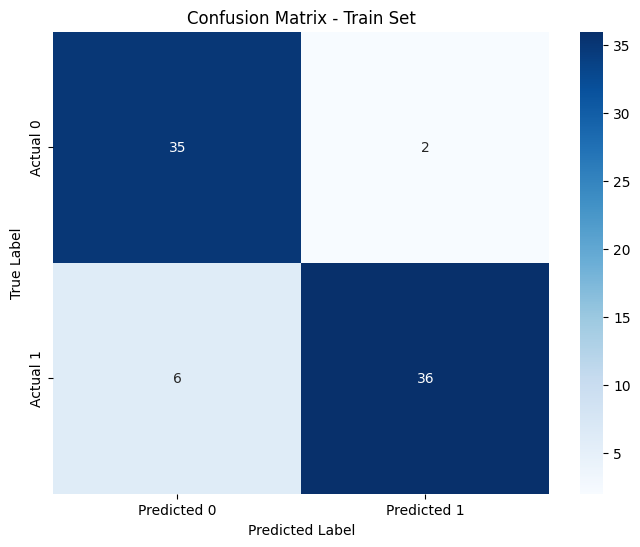

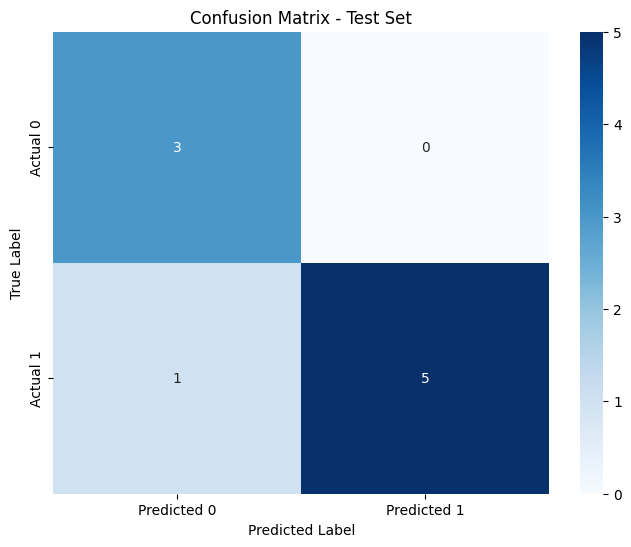

In [75]:
# Calculate confusion matrix for train and test sets
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

train_cm = confusion_matrix(y_train, train_predictions)
test_cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix for train set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


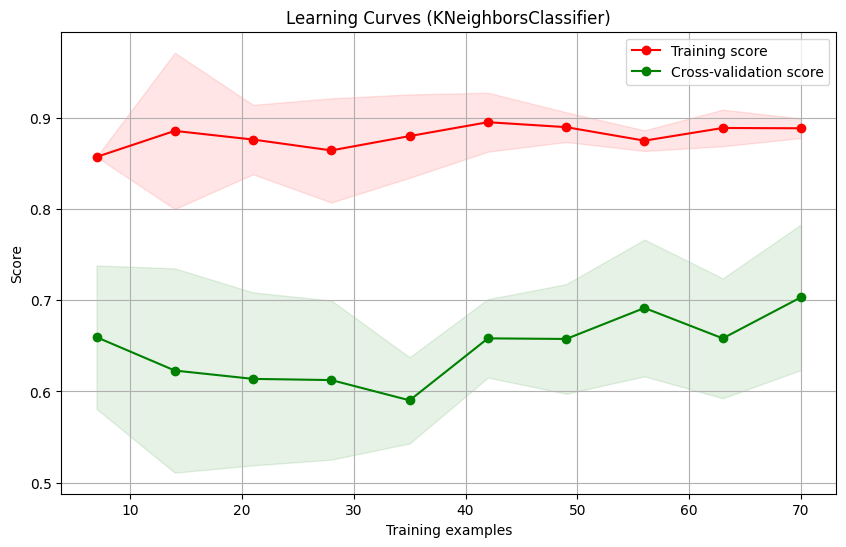

In [76]:
# Define function to plot learning curves
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot learning curves for the model
plot_learning_curve(pipeline, X_data, y_data, "Learning Curves (KNeighborsClassifier)")
plt.show()
